In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mcmc import mcmc

In [2]:
help(mcmc)

Help on class mcmc in module mcmc:

class mcmc(builtins.object)
 |  Methods defined here:
 |  
 |  EstimateVariance(...)
 |      EstimateVariance(aimfunc, limit)
 |      ===============================================
 |  
 |  MetroplisHastingsSampler(...)
 |      MetroplisHastingsSampler(aimfunc,Ti)
 |      ==================================================
 |      aimfunc:  the function to determin
 |      Ti:  the Temperature [default 1]
 |  
 |  Setup_MCMC(...)
 |      Setup_MCMC(aimfunc,initheta,nsample)
 |      ===============================================================
 |      aimfunc:  the aim function
 |      initheta: [mean, min, max, std.err]
 |      nsample:  the sample number [default: 3000]
 |      mode:
 |      0. the general Metroplis Hastings Sampler [default]
 |      1. Simulated Annealing
 |      2. estimate of unbiased variance
 |  
 |  SimulatedAnnealing(...)
 |      SimulateAnnealing(aimfunc,mode,Tmax,Tmin,Tratio)
 |      ======================================

In [3]:
def aimfunc(theta):
    n = theta.shape[0]
    chisq = 0.0
    for tt in theta:
        chisq = chisq+(tt-1)**2-np.cos(10*(tt-1))+3
    return -chisq/2.0

def prob(tt):
    pro = (tt-1)**2-np.cos(10*(tt-1))+3
    return -pro

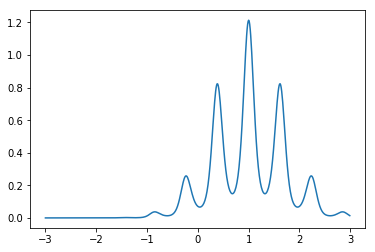

In [4]:
xx = np.arange(-3,3,0.01)
#faim = np.exp(prob(xx))
faim = np.exp(prob(xx))
A = np.sum(faim)*(xx[1]-xx[0])
plt.plot(xx, faim/A)

In [5]:
initheta = np.array([[0.2,-3,3,0.1],[-0.2,-3,3,0.1]])
mc = mcmc()


Using MCMC


In [6]:
mc.Setup_MCMC(aimfunc,initheta,5000)

In [9]:
#result = mc.MetroplisHastingsSampler(aimfunc)
#result = mc.SimulatedAnnealing(aimfunc,2)

limit = np.ones(2)*0.01
result = mc.EstimateVariance(aimfunc,limit)

the mini MSE is:   0.1058
the mini MSE is:   0.0000


In [10]:
result.shape

(3, 5000)

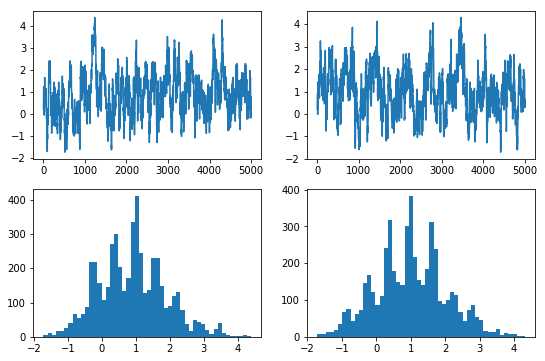

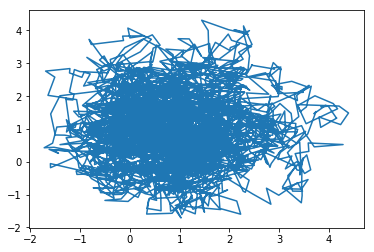

In [11]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
plt.plot(result[1])

plt.subplot(2,2,2)
plt.plot(result[2])

plt.subplot(2,2,3)
dat,bins,ign = plt.hist(result[1],bins=50)

plt.subplot(2,2,4)
dat,bins,ign = plt.hist(result[2],bins=50)

plt.show()

plt.plot(result[1], result[2])
plt.show()

In [12]:
print('%8.4f'%np.mean(result[1]), '%8.4f'%np.std(result[1]))
print('%8.4f'%np.mean(result[2]), '%8.4f'%np.std(result[2]))

print('%8.4f'%np.mean(result[1,-1000:]), '%8.4f'%np.std(result[1,-1000:]))
print('%8.4f'%np.mean(result[2,-1000:]), '%8.4f'%np.std(result[2,-1000:]))

  0.9036   0.9883
  0.9985   1.0203
  1.0798   0.8506
  0.8116   0.8951


# 退火算法

In [21]:
ndim = 2
cov = np.eye(ndim)*0.1

pre_theta = np.random.uniform(-3,3,ndim)
pre_lnlike = aimfunc(pre_theta)
iresult = [0.0]*(ndim+1)
result = []

accept = 1.0

nsample = 1000
Tmax = 100
Tmin = 0.01
Ti = Tmax
#while accept > 0.1:
# 退火算法
while Ti > Tmin:
    iacc = 0
    for i in range(nsample):
        pro_theta = np.random.multivariate_normal(pre_theta, cov)
        pro_lnlike = aimfunc(pro_theta)
        #print(pro_lnlike, pro_theta)
        # 退火算法
        alpha = np.min([1, 1.0/(1-np.exp(-(pro_lnlike-pre_lnlike)/Ti)) ])
        uni = np.random.uniform()
        if(uni < alpha):
            pre_theta = pro_theta
            pre_lnlike = pro_lnlike
            iacc = iacc+1
        #iresult[0] = pre_lnlike
        #iresult[1:] = pre_theta[:]
        #result.append(iresult)
        result.append([pre_lnlike, pre_theta[0], pre_theta[1]])
    #accept = 1.0-float(iacc)/float(nsample)
    #print('Accept is: %5.2f'%accept)
    #cov = cov*0.8
    # 退火算法
    print('Temperature is %5.2f'%Ti)
    Ti = Ti*0.6

Temperature is 100.00
Temperature is 60.00
Temperature is 36.00
Temperature is 21.60
Temperature is 12.96
Temperature is  7.78
Temperature is  4.67
Temperature is  2.80
Temperature is  1.68
Temperature is  1.01
Temperature is  0.60
Temperature is  0.36
Temperature is  0.22
Temperature is  0.13
Temperature is  0.08
Temperature is  0.05
Temperature is  0.03
Temperature is  0.02
Temperature is  0.01


In [22]:
res = np.array(result)
res.shape

(19000, 3)

In [23]:
res

array([[-4.25179112e+00, -1.41664429e-01, -1.90289469e+00],
       [-4.25179112e+00, -1.41664429e-01, -1.90289469e+00],
       [-4.25179112e+00, -1.41664429e-01, -1.90289469e+00],
       ...,
       [-2.00016621e+00,  1.43293195e-03, -2.11300459e-03],
       [-2.00016621e+00,  1.43293195e-03, -2.11300459e-03],
       [-2.00016621e+00,  1.43293195e-03, -2.11300459e-03]])

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


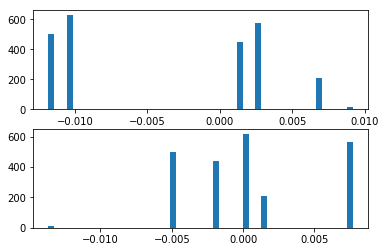

In [24]:
plt.subplot(2,1,1)
dat,bins,ign = plt.hist(res[1000:,1],bins=50, normed=True)

#plt.plot(xx, faim/A)
plt.subplot(2,1,2)
dat,bins,ign = plt.hist(res[1000:,2],bins=50, normed=True)


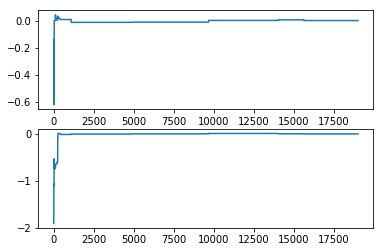

In [25]:
plt.subplot(2,1,1)
plt.plot(res[:,1])

plt.subplot(2,1,2)
plt.plot(res[:,2])

In [26]:
print(np.mean(res[10000:,1]), np.std(res[10000:,1]))
print(np.mean(res[10000:,2]), np.std(res[10000:,2]))

0.0028341645677717074 0.0018619367752381244
0.0028745712087924176 0.0044783825323289565


# 均方误差估计

In [116]:
ndim = 2
cov = np.eye(ndim)*0.1

result = np.zeros(ndim+1)

pre_theta = np.random.uniform(-3,3,ndim)
pre_lnlike = aimfunc(pre_theta)

iresult = np.append(pre_lnlike, pre_theta)
result = np.array([iresult, iresult])
result

array([[-5.59553758,  2.33241089,  0.10521155],
       [-5.59553758,  2.33241089,  0.10521155]])

In [120]:

accept = 1.0

nsample = 1000
#k=500
#r=100
#s=(nsample-k)/r
r = 100
s = 5
k = nsample - s*r


mse =10.0
while mse > 0.01:
    iacc = 0
    si = 0
    ri = 0
    Yi=np.zeros(s+1)
    for i in range(nsample):
        pro_theta = np.random.multivariate_normal(pre_theta, cov)
        pro_lnlike = aimfunc(pro_theta)
        alpha = np.min([1, np.exp(pro_lnlike-pre_lnlike)])
        uni = np.random.uniform()
        if(uni < alpha):
            pre_theta = pro_theta
            pre_lnlike = pro_lnlike
            iacc = iacc+1
        iresult = np.append(pre_lnlike, pre_theta)
        result=np.append(result, [iresult], axis=0)
        if(i>=k-1):
            Yi[si] = Yi[si] + pre_theta[0]/r            
            ri = ri+1
            if(ri == 100):
                si = si+1
                ri = 0
                
    Ybar = np.sum(Yi)/(s*r)
    mse = 1.0/s/(s-1)*np.sum((Yi-Ybar)**2)
    print('MSE is: %5.2f'%mse)

MSE is:  0.09
MSE is:  0.09
MSE is:  0.07
MSE is:  0.07
MSE is:  0.08
MSE is:  0.05
MSE is:  0.23
MSE is:  0.07
MSE is:  0.14
MSE is:  0.01


In [121]:
res = np.array(result)
res.shape

(11002, 3)

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


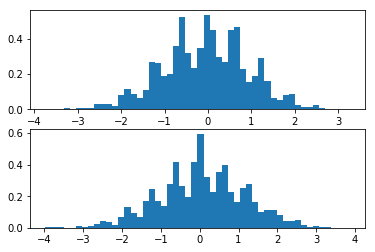

In [122]:
plt.subplot(2,1,1)
dat,bins,ign = plt.hist(res[1000:,1],bins=50, normed=True)

#plt.plot(xx, faim/A)
plt.subplot(2,1,2)
dat,bins,ign = plt.hist(res[1000:,2],bins=50, normed=True)


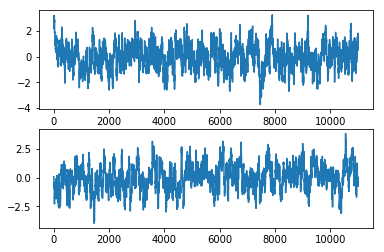

In [123]:
plt.subplot(2,1,1)
plt.plot(res[:,1])

plt.subplot(2,1,2)
plt.plot(res[:,2])

In [124]:
print(np.mean(res[10000:,1]), np.std(res[10000:,1]))
print(np.mean(res[10000:,2]), np.std(res[10000:,2]))

0.1331327924803085 0.8378787668673419
0.09003958794562572 1.2396611114903993


# MCMC sampling

In [167]:
PI = 3.1415926

def get_p(x):
    # 模拟pi函数
    return 1/(2*PI)*np.exp(- x[0]**2 - x[1]**2)

def get_tilde_p(x):
    # 模拟不知道怎么计算Z的PI，20这个值对于外部采样算法来说是未知的，对外只暴露这个函数结果
    return get_p(x)

def domain_random(): #计算定义域一个随机值
    return np.random.random()*3.8-1.9

def metropolis(x):
    new_x = (domain_random(),domain_random()) #新状态
    #计算接收概率
    acc = min(1,get_tilde_p((new_x[0],new_x[1]))/get_tilde_p((x[0],x[1])))
    #使用一个随机数判断是否接受
    u = np.random.random()
    if u<acc:
        return new_x
    return x

In [168]:
def testMetropolis(counts = 100,drawPath = False):
    plt.figure()
    #主要逻辑
    x = (domain_random(),domain_random()) #x0
    xs = [x] #采样状态序列
    for i in range(counts):
        xs.append(x)
        x = metropolis(x) #采样并判断是否接受
    #在各个状态之间绘制跳转的线条帮助可视化
    X1 = [x[0] for x in xs]
    X2 = [x[1] for x in xs]
    if drawPath: 
        plt.plot(X1, X2, 'k-',linewidth=0.5)
    ##绘制采样的点
    plt.scatter(X1, X2, c = 'g',marker='.')
    plt.show()

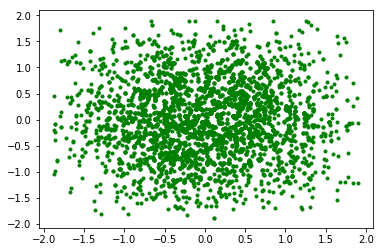

In [169]:
testMetropolis(5000)

## 一个例子

In [185]:
def f(x):
    if 0 <= x and x <= 0.25:
        y = 8 * x
    elif 0.25 < x and x <= 1:
        y = (1 - x) * 8/3
    else:
        y = 0
    return y

def g(x):
    if 0 <= x and x <= 1:
        y = 1
    else:
        y = 0
    return y

def plot(fun):
    X = np.arange(0, 1.0, 0.01)
    Y = []
    for x in X:
        Y.append(fun(x))
    plt.plot(X, Y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show() 

def domain_random(): #计算定义域一个随机值
    return np.random.random()

def metropolis(x):
    new_x = domain_random()
    #计算接收概率
    acc = min(1,f(new_x)/f(x))
    #使用一个随机数判断是否接受
    u = np.random.random()
    if u<acc:
        return new_x
    return x

def testMetropolis(counts = 100,drawPath = False):
    plt.figure()
    #主要逻辑
    x = domain_random()
    xs = [x] #采样状态序列
    for i in range(counts):
        xs.append(x)
        x = metropolis(x) #采样并判断是否接受
    #在各个状态之间绘制跳转的线条帮助可视化
    plt.hist(xs, bins=100, edgecolor='None')  
#     plt.plot(xs)
    plt.show()

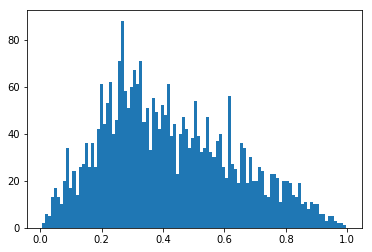

In [184]:
testMetropolis(3000)

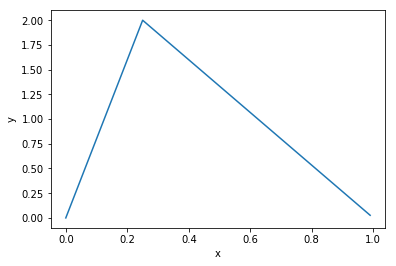

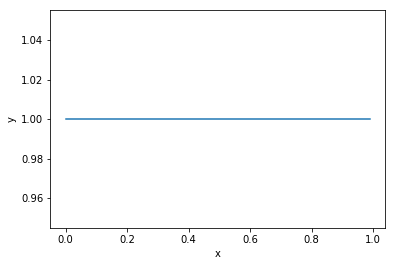

In [186]:
plot(f)
plot(g)

In [3]:
initheta = np.array([[0.0, -1, 1, 0.1],[3,1,4,0.1]])

In [8]:
initheta[:,3]

array([0.1, 0.1])

In [10]:
np.eye(2)*initheta[:,2]

array([[1., 0.],
       [0., 4.]])

In [11]:
np.random.uniform(initheta[:,1],initheta[:,2])

array([0.59594453, 3.03217277])

# 新

In [14]:
import pandas as pd

In [109]:
a = np.random.uniform(-1,1,5)
#np.save('my_dat', a)
a = np.array([a, a])
a

array([[0.54638442, 0.15152538, 0.80309349, 0.84387421, 0.234393  ],
       [0.54638442, 0.15152538, 0.80309349, 0.84387421, 0.234393  ]])

In [110]:
for i in range(10):
    b = np.random.uniform(2,3,5)
    a = np.append(a, [b], axis=0)

In [111]:
a

array([[0.54638442, 0.15152538, 0.80309349, 0.84387421, 0.234393  ],
       [0.54638442, 0.15152538, 0.80309349, 0.84387421, 0.234393  ],
       [2.18377474, 2.73872706, 2.4003251 , 2.69104654, 2.39818553],
       [2.93610036, 2.05047563, 2.86064819, 2.88095902, 2.91513822],
       [2.13141542, 2.40365804, 2.97168332, 2.85440227, 2.13882451],
       [2.67106923, 2.63352658, 2.88640705, 2.8471149 , 2.28519261],
       [2.7312979 , 2.12335541, 2.59440157, 2.46898365, 2.9717356 ],
       [2.1120067 , 2.98646034, 2.51368879, 2.70107536, 2.1721646 ],
       [2.05473989, 2.91418117, 2.87353961, 2.04295515, 2.87070414],
       [2.37093623, 2.53415104, 2.1129574 , 2.18687255, 2.67900906],
       [2.08647738, 2.73816352, 2.90011826, 2.09759436, 2.294849  ],
       [2.08609199, 2.31663799, 2.17514039, 2.93207238, 2.45418124]])

In [66]:
dat = np.load('my_dat.npy')

In [67]:
dat

array([-0.75616422,  0.36706742, -0.97661625, -0.56452842, -0.10995129])

In [68]:
help(np.append)

Help on function append in module numpy.lib.function_base:

append(arr, values, axis=None)
    Append values to the end of an array.
    
    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.
    
    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.
    
    See Also
    --------
    insert : Insert elements into an array.


In [69]:
a

array([-0.75616422,  0.36706742, -0.97661625, -0.56452842, -0.10995129,
        2.22678492,  2.50800322,  2.71859239,  2.63971238,  2.78990468,
        2.21947053,  2.35910732,  2.20165036,  2.32224272,  2.99875364,
        2.45345121,  2.20661788,  2.02995373,  2.93684668,  2.40752179,
        2.5451213 ,  2.10252037,  2.96953133,  2.35697024,  2.9043669 ,
        2.31381079,  2.16887716,  2.07441952,  2.10687764,  2.33435808,
        2.57629651,  2.65523184,  2.04632334,  2.41423221,  2.21351856,
        2.12665661,  2.74800398,  2.43789298,  2.18055591,  2.77187675,
        2.34554426,  2.64570603,  2.2684719 ,  2.9258419 ,  2.75765986,
        2.28101256,  2.27204541,  2.71948219,  2.53262975,  2.18048657,
        2.05184161,  2.24434511,  2.26203476,  2.89174692,  2.40812305])